Visualization Workflow for Single-Cell Transcriptomics Analysis

#### Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import anndata as ad 
import scanpy as sc
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import sparse

#### Load preprocessed single-cell dataset
#### Reorder cell type categories

In [ ]:
adata=sc.read_h5ad('immune.h5ad')
new_order = ['CD4+T', 'CD8+T','NKT','gdT','NK','ILC2','B','Plasma','cDC1', 'cDC2', 'Ccr7+DCs', 
             'Inflammatory IMs','Regulatory IMs(Ly6C+Arg1+)','Regulatory IMs(Cd206+)', 'AMs','Monocytes', 
             'Classic Neutrophils','Inflammatory Neutrophils','Transitional Neutrophils',]
adata.obs["cell type"] = adata.obs["cell type"].cat.reorder_categories(new_order, ordered=True)

In [ ]:
marker_genes_raw = [
   'Cd3d', 'Cd3e', 'Trac', 'Cd4', 'Cd8a','Zbtb16', 'Trdc', 'Cd7', 'Nkg7','Trdv4','Trgv2',
'Gzma', 'Eomes', 'Prf1','Ncr1','Klrb1c','Klrg1', 'Calca','Cd79a', 'Cd79b', 'Cd19',
 'Ighd', 'Ighm','Sdc1', 'Igha', 'Xbp1', 'Igha',
"H2-Ab1","Flt3","Itgae","Xcr1","Itgax","Ccr7",
'Adgre1','Nos2', "Slamf8",'Ly6c2', 'Arg1',
'Mrc1', 'Cd163','Siglecf',"Cd300ld" , 'Ceacam1', "Cxcr2","Retnlg",
"S100a8","S100a9", "Ifit1", "Ifit3", "Cxcl10", "Tnf", "Ccl4","Ccl3"]

#### UMAP visualization by experimental class

In [ ]:
sc.pl.umap(adata, color=['class'], legend_fontsize=6,save='class.pdf')
ax = sc.pl.dotplot(adata, marker_genes_raw, groupby='cell type',dendrogram=False, swap_axes=True, 
                   standard_scale="var",
                   cmap='PiYG_r', 
                   save='celltypegenes.pdf',
                
                      )   

#### Prepare z-score normalized data for heatmap visualization

In [ ]:
adata = adata.raw.to_adata() 
adataZ=adata.copy()
adataZ = adataZ.raw.to_adata()
sc.pp.scale(adataZ, zero_center=True)
adataZ.layers['zscore'] = adataZ.X

In [239]:
new_order = ['CD4+T', 'CD8+T','NKT','gdT','NK','ILC2','B','Plasma','cDC1', 'cDC2', 'Ccr7+DCs', 
             'Inflammatory IMs','Regulatory IMs(Ly6C+Arg1+)','Regulatory IMs(Cd206+)', 'AMs','Monocytes', 
             'Classic Neutrophils','Inflammatory Neutrophils','Transitional Neutrophils',]
adataZ.obs["cell type"] = adataZ.obs["cell type"].cat.reorder_categories(new_order, ordered=True)

#### Dot plot visualization of marker gene expression across immune cell types (z-score normalized)

c:\Users\wangqiang\anaconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


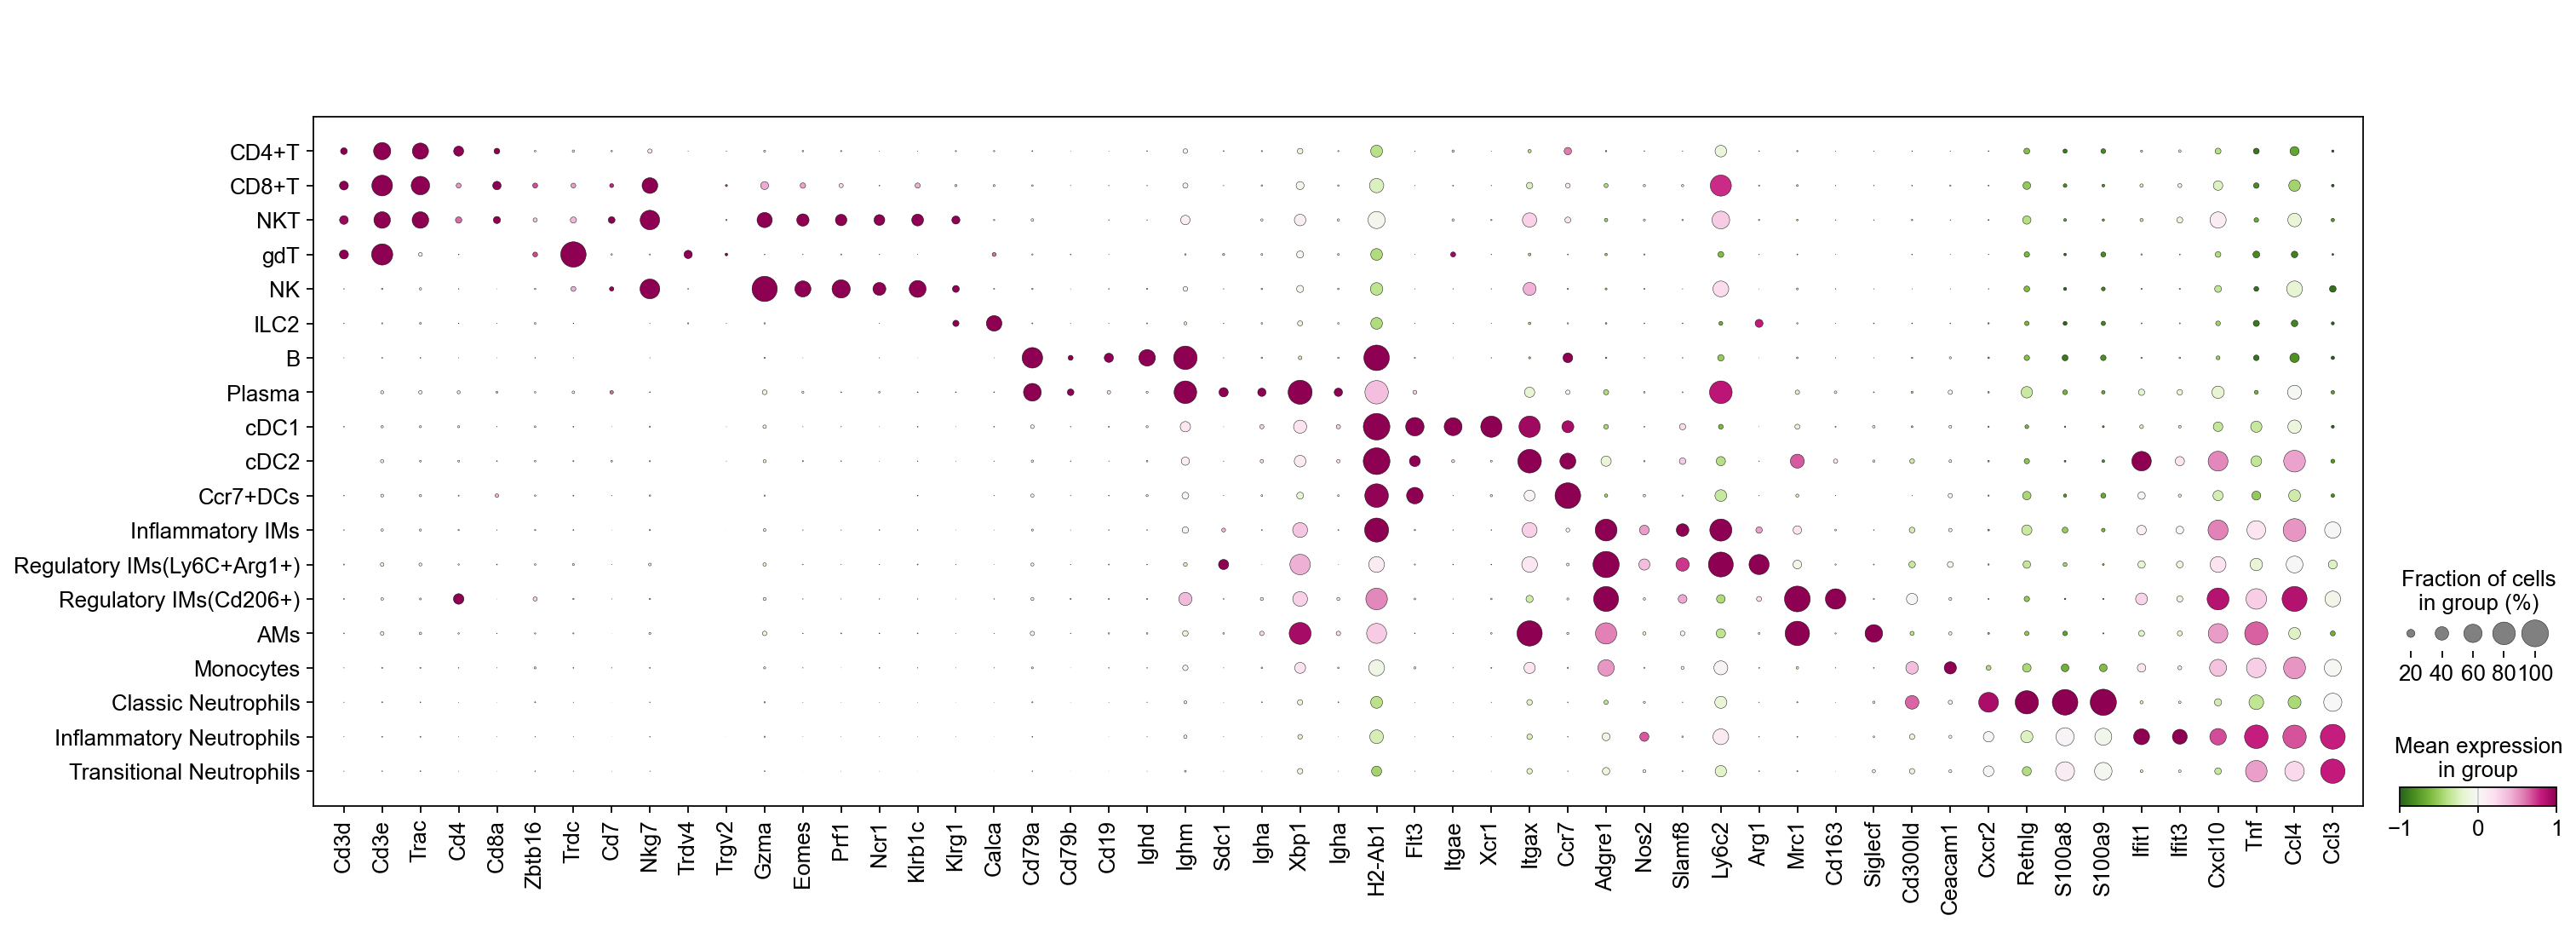

In [ ]:
sc.pl.dotplot(adataZ, marker_genes_raw, groupby='cell type',dendrogram=False, swap_axes=False,          
                   cmap='PiYG_r',         
                   save='celltypegenes22223.pdf',
                     vmin=-1, 
                      vmax=1 ,
                      )  

#### UMAP visualization of gene expression

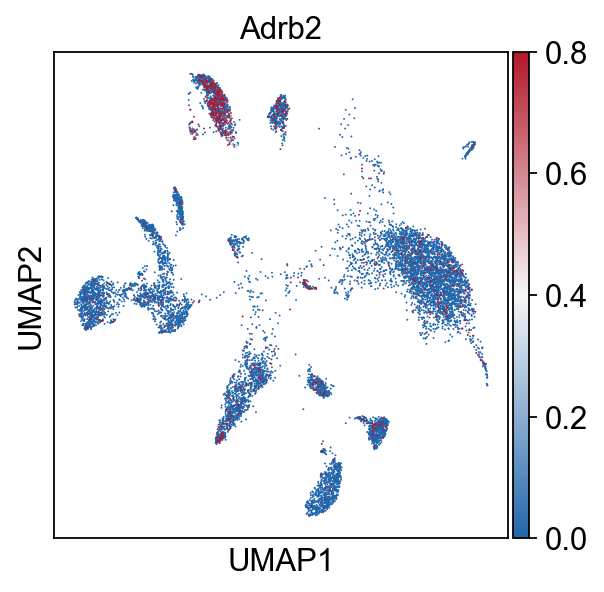

In [ ]:
sc.pl.umap(
    adataC, 
    color='Adrb2', 
    cmap=custom_cmap,
    vmax=0.8,
      size=3, use_raw=False,
    alpha=1,
    save='Adrb23.pdf'
)

In [41]:
adata_infIM = adata[np.in1d(adata.obs['cell type'],['Inflammatory IMs'])].copy() 

In [43]:
adata_infIM = adata_infIM[np.in1d(adata_infIM.obs['class'],['LPS','Gq'])].copy() 

In [46]:
new_order = [ 'LPS','Gq',]
adata_infIM.obs["class"] = adata_infIM.obs["class"].cat.reorder_categories(new_order, ordered=True)

#### Violin plot of gene expression grouped by experimental class

c:\Users\wangqiang\anaconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
c:\Users\wangqiang\anaconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
C:\Users\wangqiang\AppData\Local\Temp\ipykernel_35380\2413062981.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LPS vs. Gq: t-test independent samples, P_val:7.654e-35 t=1.245e+01


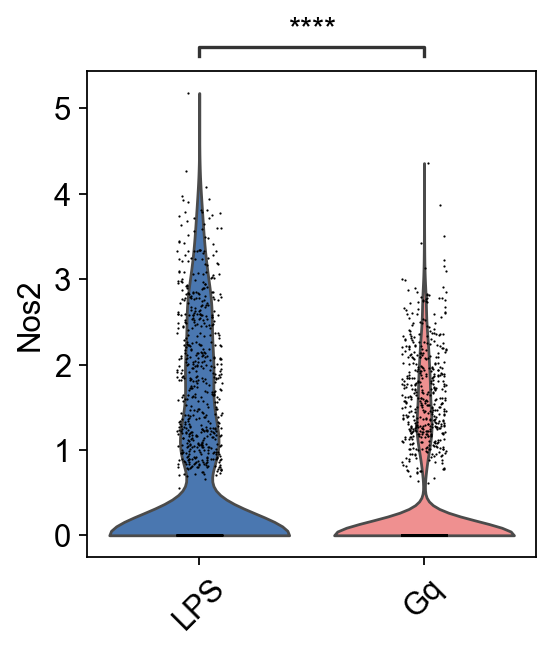

In [ ]:
with plt.rc_context({"figure.figsize": (4, 4)}):
    ax = sc.pl.violin(
        adata_infIM,
        keys="Nos2",
        groupby="class",
        rotation=45,
        show=False,
        cut=0,
         inner=None, 
        palette={"LPS": "#3975C1", "Gq": "#FF8080"}  
    )
    ax.grid(False)
    pairs = [("LPS", "Gq")]
    df = pd.DataFrame({
        "Nos2": adata_infIM[:, "Nos2"].X.toarray().flatten(),
        "class": adata_infIM.obs["class"].values
    })
    annotator = Annotator(ax, pairs, data=df, x="class", y="Nos2")
    annotator.configure(test='t-test_ind', text_format='star', loc='outside')
    annotator.apply_and_annotate()
    plt.tight_layout()
    plt.savefig("violin_Nos2_customcolor.pdf", format='pdf', dpi=300)
    plt.show()

In [327]:
adata_infIM.write_h5ad('FIG_IM_violin_Nos2.h5ad')

In [95]:
adata_infIM_C = adata_infIM[np.in1d(adata_infIM.obs['class'],['Ctrl'])].copy() 
adata_infIM_L = adata_infIM[np.in1d(adata_infIM.obs['class'],['LPS'])].copy() 
adata_infIM_Gq = adata_infIM[np.in1d(adata_infIM.obs['class'],['Gq'])].copy() 

#### Plot stacked bar chart of cell type composition by experimental class
#### Generate and save legend separately

C:\Users\wangqiang\AppData\Local\Temp\ipykernel_15968\1327905456.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\wangqiang\AppData\Local\Temp\ipykernel_15968\1327905456.py:31: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  fig_legend.legend(handles=legend.legendHandles,


<Figure size 1600x3200 with 0 Axes>

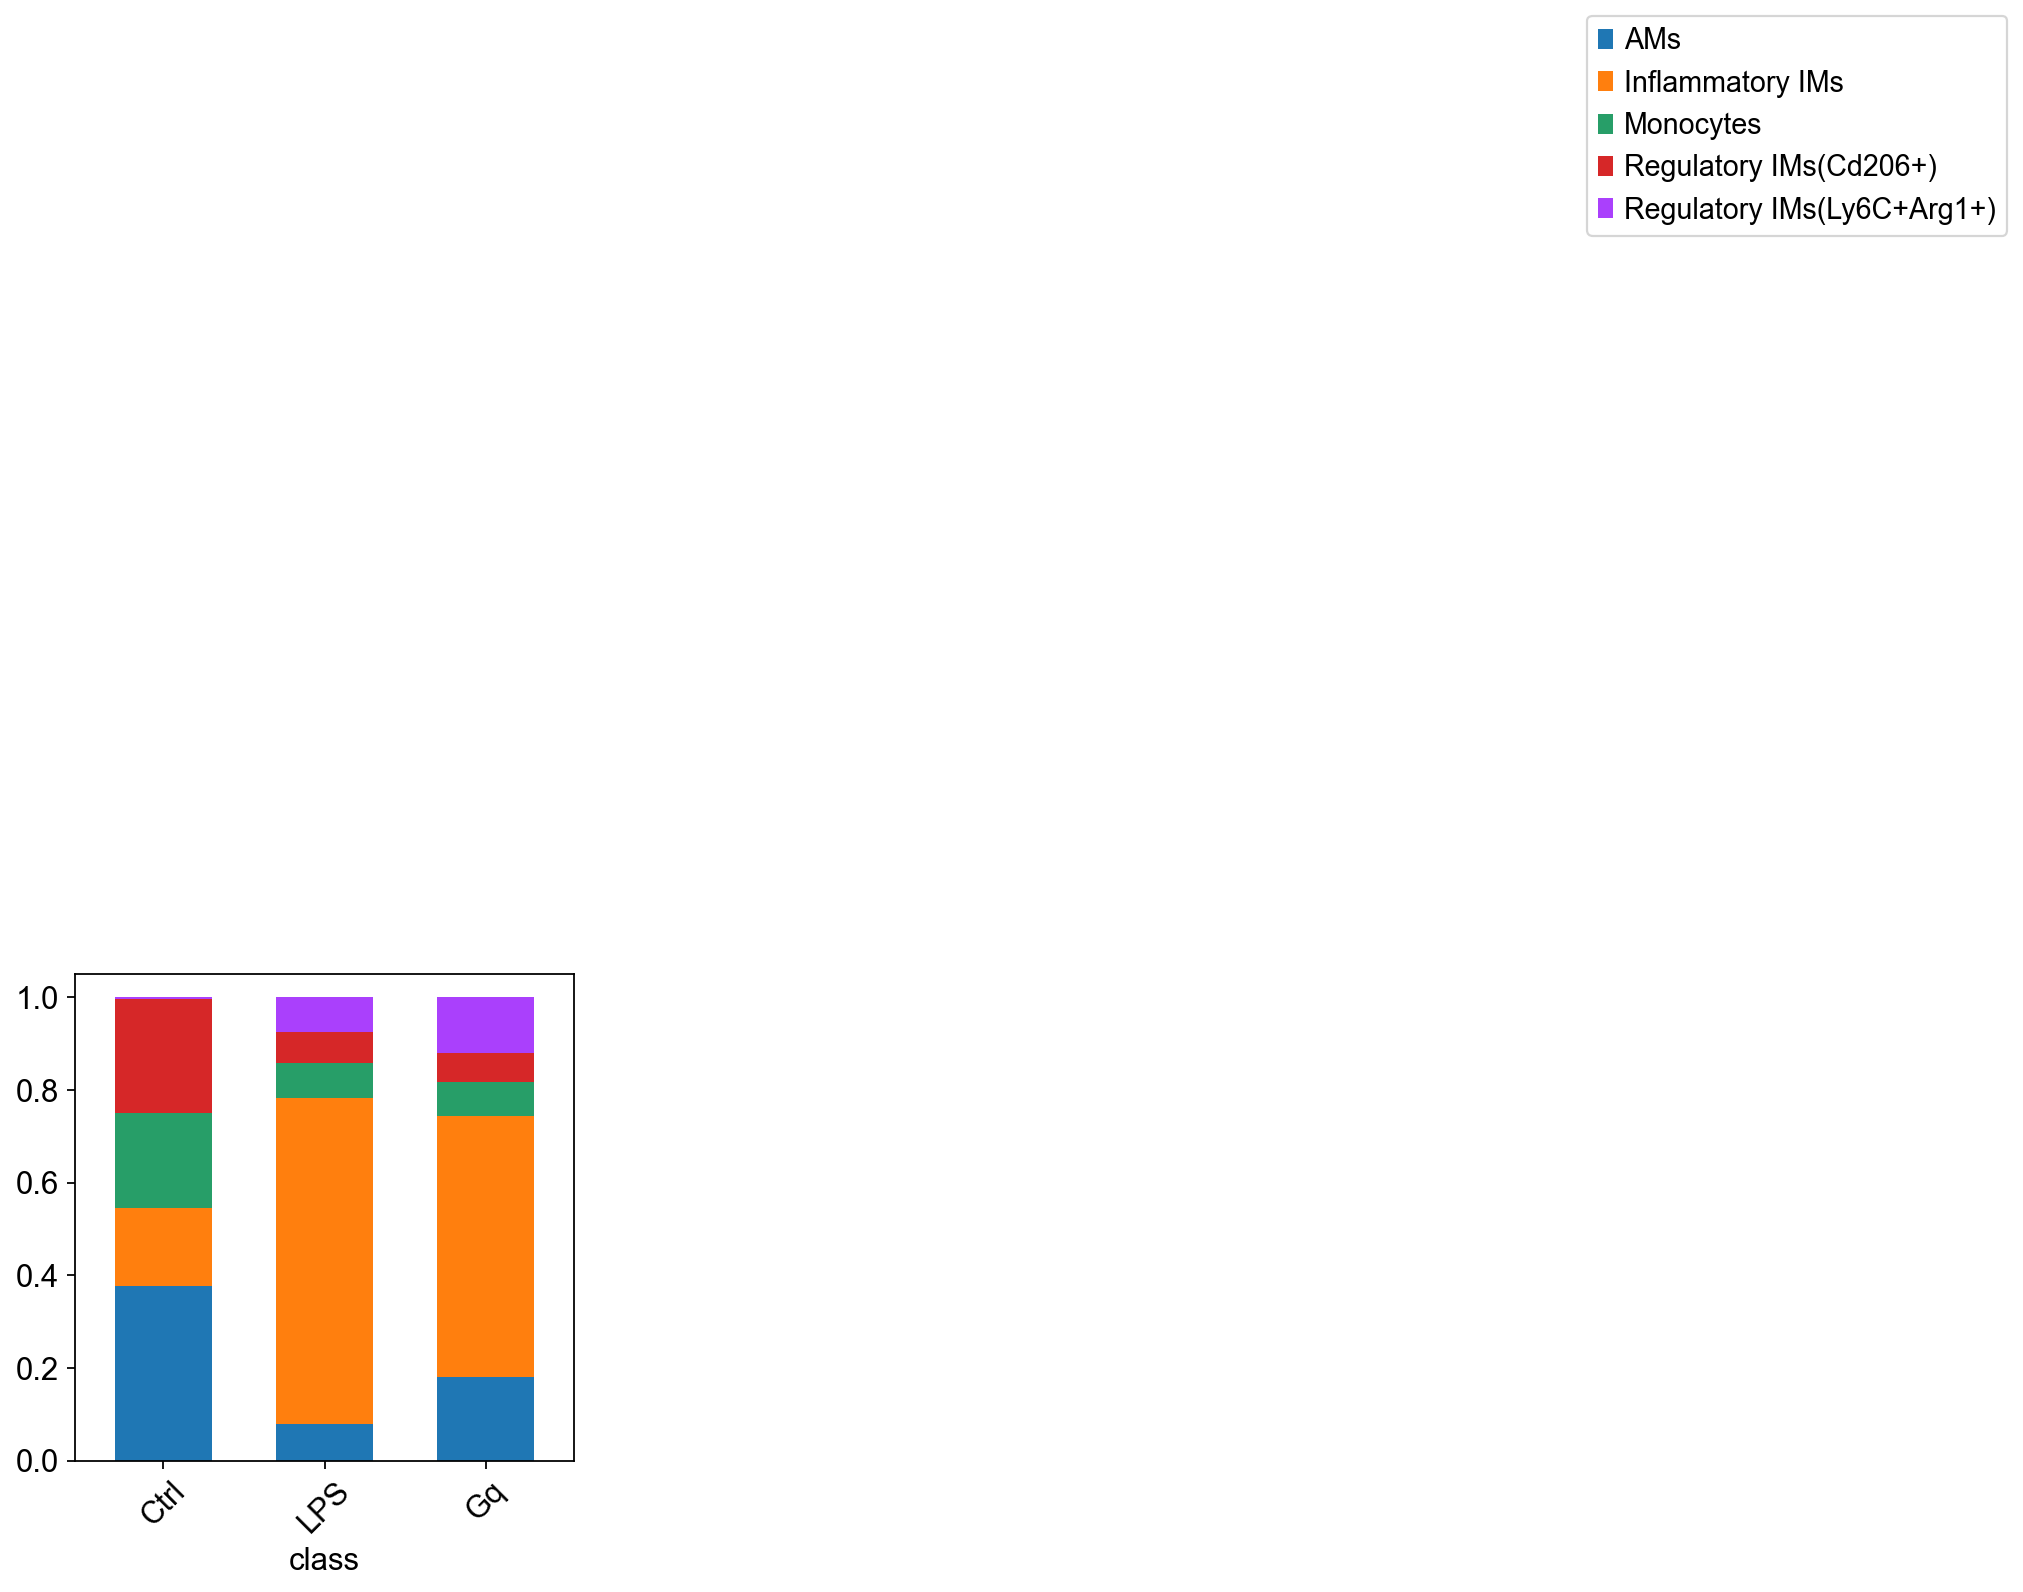

In [ ]:
order = ['Ctrl', 'LPS', 'Gq']
plt.figure(figsize=(20, 40))
adataMac.obs['class'] = pd.Categorical(adataMac.obs['class'], categories=order, ordered=True)
tmp = pd.crosstab(adataMac.obs['class'], adataMac.obs['cell type'], normalize='index')
ax = tmp.plot.bar(stacked=True, width=0.6, edgecolor='none')
ax.legend(loc='upper left', bbox_to_anchor=(3, 3))
ax.grid(False)
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig('crosstab.pdf')

tmp = pd.crosstab(adataMac.obs['class'], adataMac.obs['cell type'], normalize='index')
fig, ax = plt.subplots(figsize=(20, 40))
bar_container = tmp.plot.bar(ax=ax, stacked=True, width=0.6, edgecolor='none')
legend = ax.legend(loc='center', bbox_to_anchor=(0.5, 0.5))
plt.close(fig)

fig_legend = plt.figure(figsize=(6, 10))
fig_legend.legend(handles=legend.legendHandles,
                  labels=[t.get_text() for t in legend.get_texts()],
                  loc='center', frameon=False, ncol=1)
plt.axis('off')
plt.tight_layout()
fig_legend.savefig('legend_only.pdf', bbox_inches='tight')
plt.close(fig_legend)
plt.show()


#### Plot stacked bar chart of neutrophil subtype proportions by experimental class
#### Create and save the legend separately

C:\Users\wangqiang\AppData\Local\Temp\ipykernel_15968\867527736.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\wangqiang\AppData\Local\Temp\ipykernel_15968\867527736.py:31: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  fig_legend.legend(handles=legend.legendHandles,


<Figure size 1600x3200 with 0 Axes>

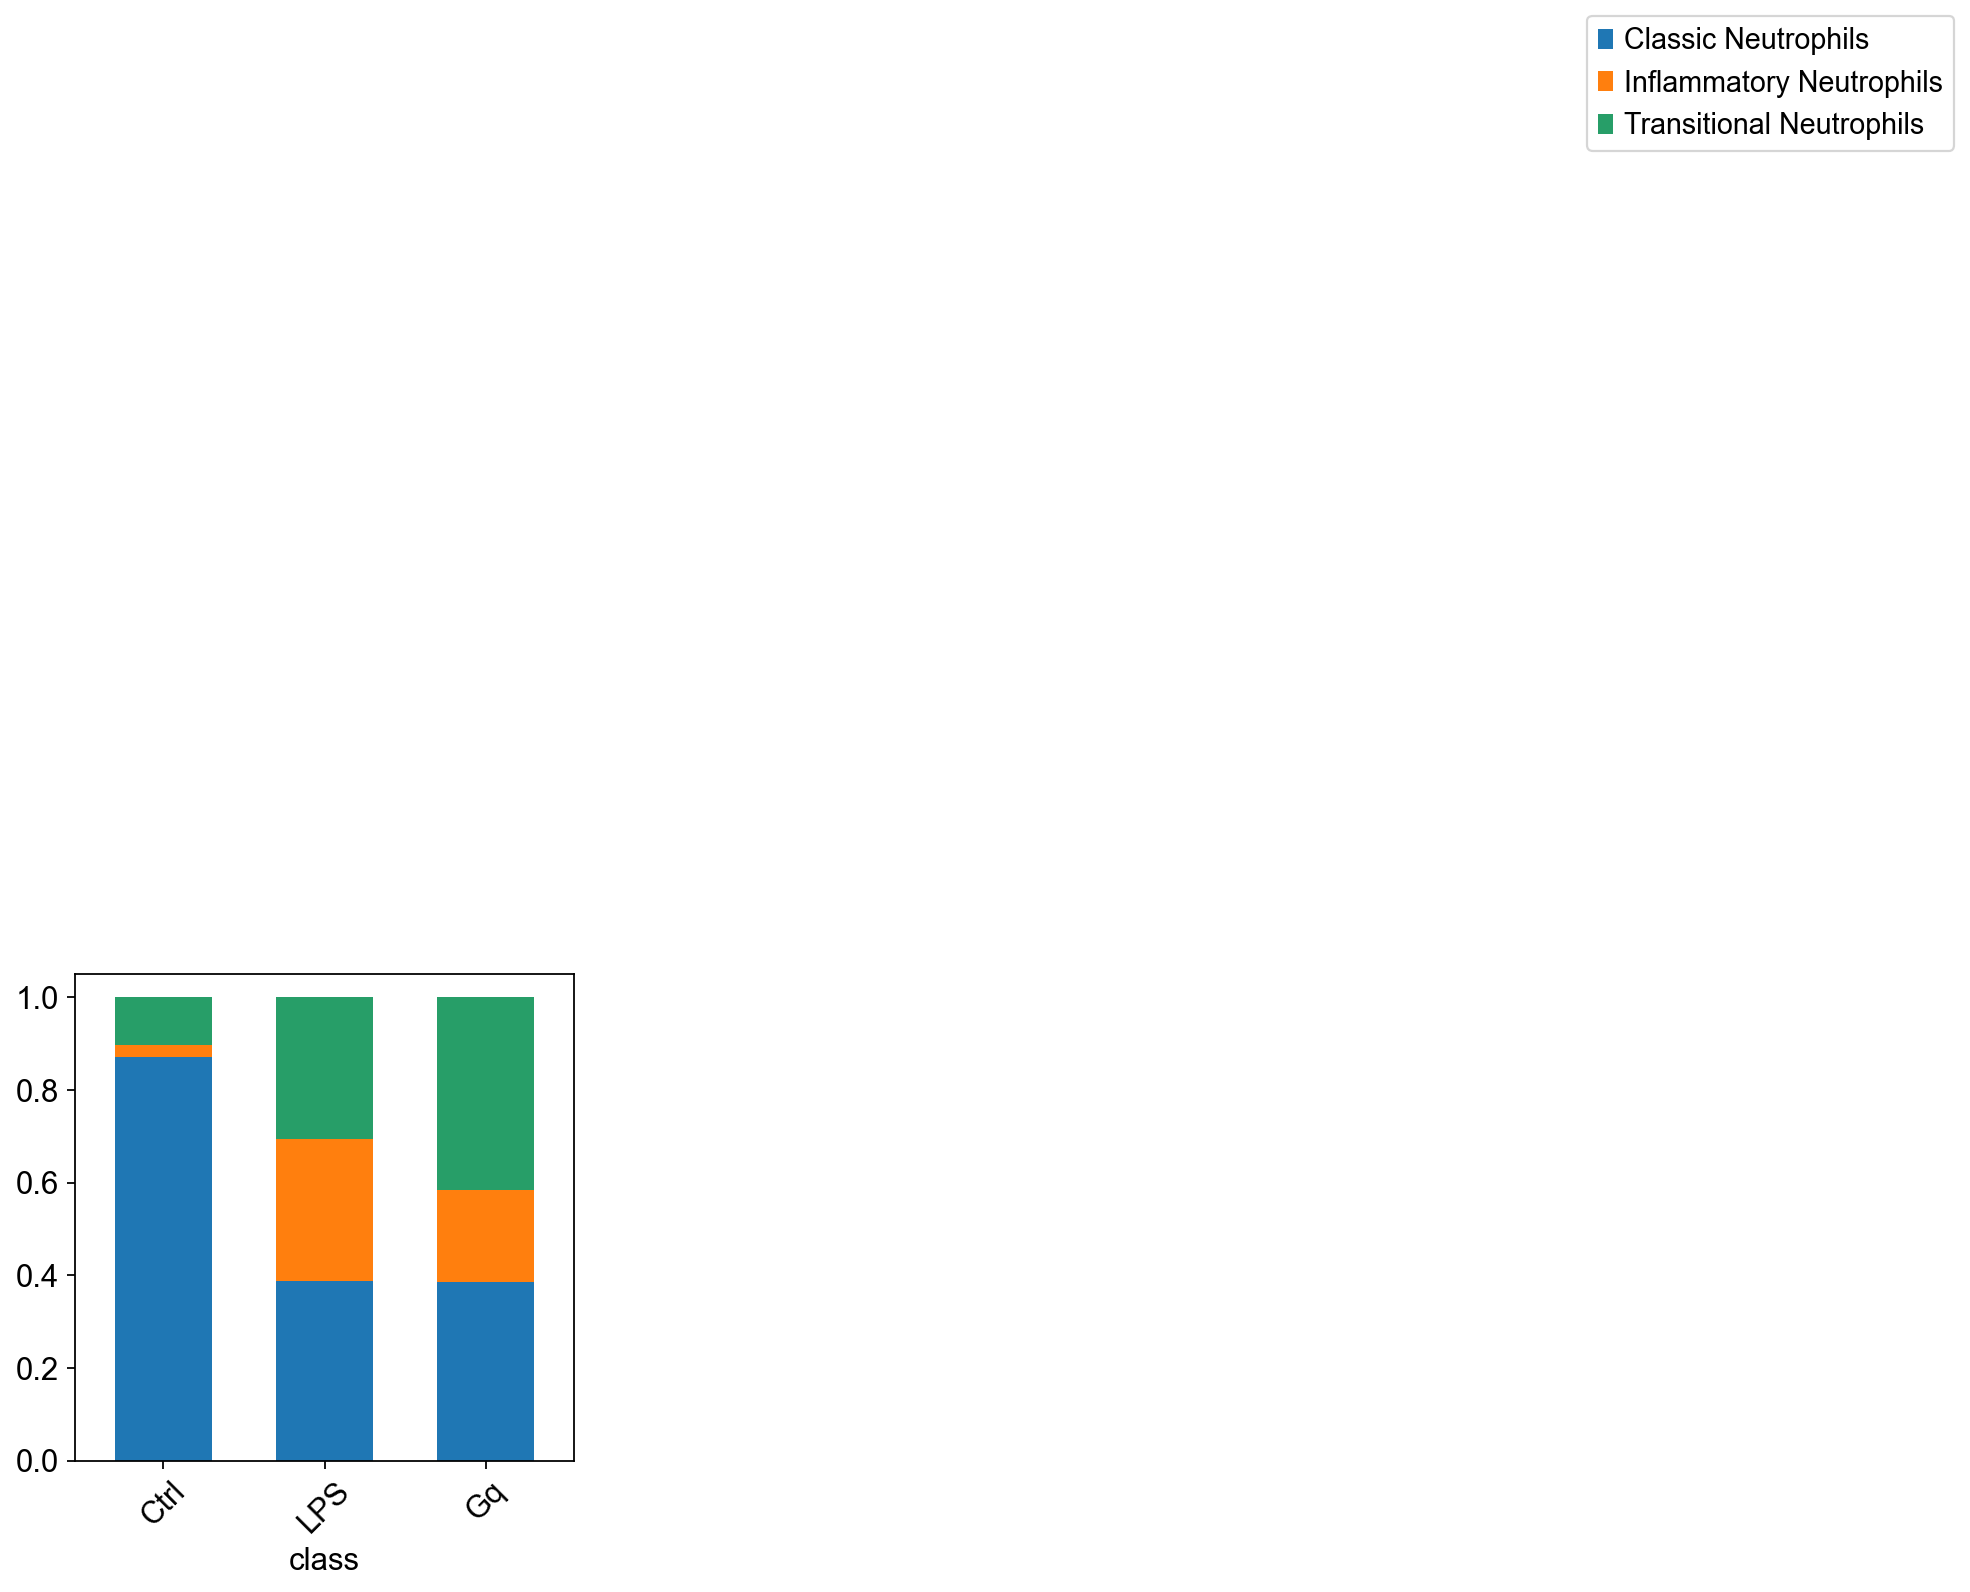

In [ ]:
order = ['Ctrl', 'LPS', 'Gq']
plt.figure(figsize=(20, 40))
adataNeutrophils.obs['class'] = pd.Categorical(adataNeutrophils.obs['class'], categories=order, ordered=True)
tmp = pd.crosstab(adataNeutrophils.obs['class'], adataNeutrophils.obs['cell type'], normalize='index')
ax = tmp.plot.bar(stacked=True, width=0.6, edgecolor='none')
ax.legend(loc='upper left', bbox_to_anchor=(3, 3))
ax.grid(False)
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig('crosstab.pdf')

tmp = pd.crosstab(adataNeutrophils.obs['class'], adataNeutrophils.obs['cell type'], normalize='index')
fig, ax = plt.subplots(figsize=(20, 40))
bar_container = tmp.plot.bar(ax=ax, stacked=True, width=0.6, edgecolor='none')
legend = ax.legend(loc='center', bbox_to_anchor=(0.5, 0.5))
plt.close(fig)

fig_legend = plt.figure(figsize=(6, 10))
fig_legend.legend(handles=legend.legendHandles,
                  labels=[t.get_text() for t in legend.get_texts()],
                  loc='center', frameon=False, ncol=1)
plt.axis('off')
plt.tight_layout()
fig_legend.savefig('legend_only2.pdf', bbox_inches='tight')
plt.close(fig_legend)
plt.show()